# Usefulness of Chybyshev polynomials in real world signals


# Introduction to Chebyshev Polynomials

Chebyshev polynomials are a family of orthogonal polynomials that play a significant role in various fields of mathematics, engineering, and computational sciences. They are named after Pafnuty Chebyshev, a Russian mathematician who introduced these polynomials in the 19th century.

## Definition

The Chebyshev polynomials are two sequences of polynomials related to the cosine and sine functions, notated as 
$T_{n}(x)$ and $U_{n}(x)$.
They can be defined in several equivalent ways, one of which starts with trigonometric functions:
The Chebyshev polynomials of the first kind, denoted as $T_n(x)$, are defined on the interval $[-1, 1]$ as follows:

$$
T_{n}(\cos \theta )=\cos(n\theta ), \quad -1 \leq x \leq 1
$$


The Chebyshev polynomials of the second kind, denoted as $U_n(x)$, are defined on the same interval as:

$$
U_{n}(\cos \theta )\sin \theta =\sin (((n+1)\theta )), \quad -1 \leq x \leq 1
$$

## Properties

1. **Orthogonality**: Chebyshev polynomials are orthogonal with respect to the weight function $\frac{1}{\sqrt{1-x^2}}$ on the interval \([-1, 1]\). Mathematically, this orthogonality property can be expressed as:

$$
\int_{-1}^{1} T_m(x) \cdot T_n(x) \cdot \frac{1}{\sqrt{1-x^2}} \, dx = 
\begin{cases} 
0 & \text{if } m \neq n \\
\frac{\pi}{2} & \text{if } m = n \neq 0 \\
\pi & \text{if } m = n = 0 
\end{cases}
$$

2. **Recurrence Relation**: Chebyshev polynomials satisfy a recurrence relation of the form:

$$
T_{n+1}(x) = 2x \cdot T_n(x) - T_{n-1}(x)
$$

for $n \geq 1 $, with initial conditions $ T_0(x) = 1 $ and $ T_1(x) = x $.

3. **Roots**: The $n$ roots of $T_n(x)$ are given by:

$$
x_k = \cos\left(\frac{(2k-1)\pi}{2n}\right), \quad k = 1, 2, \ldots, n
$$

## Applications

Chebyshev polynomials find applications in various areas, including:

- **Approximation Theory**: They are used for polynomial approximation of functions over a specified interval with minimal error.
- **Signal Processing**: Chebyshev filters are designed using Chebyshev polynomials for applications such as digital signal processing.
- **Numerical Analysis**: They are employed in numerical methods for solving differential equations and integral equations.
- **Orthogonal Polynomials**: Chebyshev polynomials are one of the families of orthogonal polynomials, with applications in mathematical physics and probability theory.

In summary, Chebyshev polynomials are a powerful mathematical tool with diverse applications, owing to their orthogonality, recurrence relation, and efficient computational properties.



# Chybyshev filter

# Basics of Chebyshev Filters

Chebyshev filters are a type of analog or digital filter commonly used in signal processing and communication systems. They are named after the Russian mathematician Pafnuty Chebyshev becuase its mathematical characteristics are derived from Chebyshev polynomials.They are characterized by their ability to achieve a sharper roll-off between the passband and stopband compared to other filter designs.

<br>
In signal processing, a filter is a device or process that removes some unwanted components or features from a signal. Most often, this means removing some frequencies or frequency bands. A filter is called linear if it processes time-varying inputs to produce output signals following linearity. We will use the term filter and linear filter synonmymously throughout the tutorial. 
The different types of linear filters are : 

1. **Low-pass filter**: Allow all freqencies below a cutoff frequency to pass.

2. **High-pass filter**: Allow all freqencies above a cutoff frequency to pass.

3. **Band-pass filter**: only frequencies in a frequency band are passed.

4. **Band-stop filter**: only frequencies in a frequency band are attenuated.

4. **Notch filter**: rejects just one specific frequency - an extreme band-stop filter.

5. **Comb filter**: has multiple regularly spaced narrow passbands giving the bandform the appearance of a comb.

5. **All-pass filter**: all frequencies are passed, but the phase of the output is modified.

![image](https://upload.wikimedia.org/wikipedia/en/thumb/e/ec/Bandform_template.svg/600px-Bandform_template.svg.png)

**Different types of filter familes are:**

1. **Chebyshev filter**: It has the best approximation to the ideal response of any filter for a specified order and ripple.
2. **Butterworth filter**: It has a maximally flat frequency response.
3. **Bessel filter**: It has a maximally flat phase delay.
4. **Elliptic filter**: It has the steepest cutoff of any filter for a specified order and ripple.

![image](https://www.elprocus.com/wp-content/uploads/2016/08/Frequency-Response-Curve.jpg)

The difference between these filter families is that they all use a different polynomial function to approximate to the ideal filter response. This results in each having a different transfer function. In the Chebyshev filter we will use Chybyshev polynomials to model the filter response.

## Types of Chebyshev Filters:

1. **Chebyshev Type I**: Equiripple characteristics in the passband with a monotonically decreasing magnitude response in the stopband.

2. **Chebyshev Type II**: Equiripple characteristics in the stopband with a monotonically decreasing magnitude response in the passband.

In our example we will work with Type I filters. But implemeneting the Type II is very similar.

![image](https://documentation.sas.com/api/docsets/casactforecast/v_009/content/images/filterdiff.png?locale=en)

## Applications:

Chebyshev filters find applications in various areas, including:

- Audio and speech processing
- Telecommunications
- Radar and sonar systems
- Biomedical signal processing
- Control systems

## Implementing a Chybyshev filter

## Terminology:

1. **Cutoff frequency**: It is the frequency beyond which the filter will not pass signals. It is usually measured at a specific attenuation such as 3 dB.

2. **Passband**: The range of frequencies in which the filter allows signals to pass through with minimal attenuation.

3. **Stopband**: The range of frequencies in which the filter attenuates signals to a specified level.

4. **Transition band**: The (usually narrow) band of frequencies between a passband and stopband.

5. **Rolloff**: Roll-off is the rate at which attenuation increases beyond the cut-off frequency.

4. **Ripple**: It is the variation of the filter's insertion loss in the passband.

3. **Passband Ripple**: Variation in magnitude response within the passband, specified by a maximum allowable ripple amplitude  $A_p$ in decibels.

4. **Stopband Attenuation**: Level of attenuation achieved by the filter in the stopband, specified by stopband attenuation  $A_s$ in decibels.

5. **Filter Order**: The order of a filter is the degree of the approximating polynomial and in passive filters corresponds to the number of elements required to build it. Increasing order increases roll-off and brings the filter closer to the ideal response.

## Design Process:

The design of Chebyshev filters involves specifying the passband and stopband frequencies, passband ripple, and stopband attenuation. Using these specifications, the filter order $N$ and critical frequency  $\omega_c$ are computed. The filter coefficients $z$ and $p$ are then determined using algorithms such as the Chebyshev polynomial approximation method.

The gain (or amplitude) response, $G_{n}(\omega )$, as a function of angular frequency ${\omega }$ of the $n$th-order low-pass filter is equal to the absolute value of the transfer function $H_{n}(s)$ evaluated at $s=j\omega $ is given as : 

$$
|H(j\omega)| = \frac{1}{\sqrt{1 + \varepsilon^2 \cdot T_N^2(\omega/\omega_c)}}
$$

where, 
- $\omega$ is the frequency variable,
- $\omega_c$ is the cutoff frequency,
- $T_N$ is the Chebyshev polynomial of order \(N\), and
- $\varepsilon$ is the ripple factor.

The passband exhibits equiripple behavior, with the ripple determined by the ripple factor $\varepsilon$. In the passband, the Chebyshev polynomial alternates between -1 and 1 so the filter gain alternate between maxima at $G=1$ and minima at $G=1/{\sqrt {1+\varepsilon ^{2}}}$

The ripple factor ε is thus related to the passband ripple δ in decibels by:
$$
\varepsilon ={\sqrt {10^{\delta /10}-1}}
$$

## Implementation

Here we are designing a Low-pass filter with the following input parameters

- order of the filter $N$ = 10,
- cutoff frequency $\omega_c$ = 120,
- Maximum ripple $r_p$ = 5,
- Sampling Frequency $f_s$ = 1000
- input signal $y(t)$ = $\sin(2\pi(45)t)$ + $\sin(2\pi(90)t)$ + $\sin(2\pi(130)t)$ + $\sin(2\pi(210)t)$


In [10]:
from scipy import signal
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import numpy as np

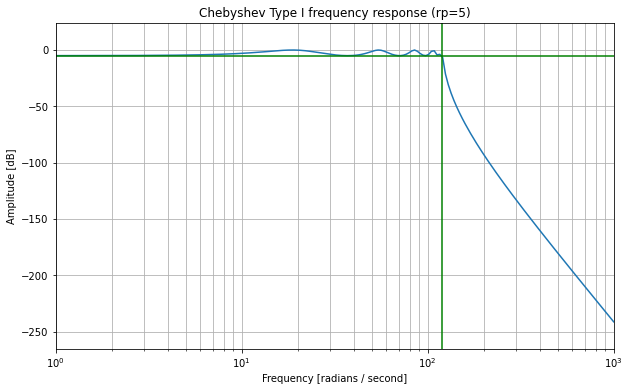

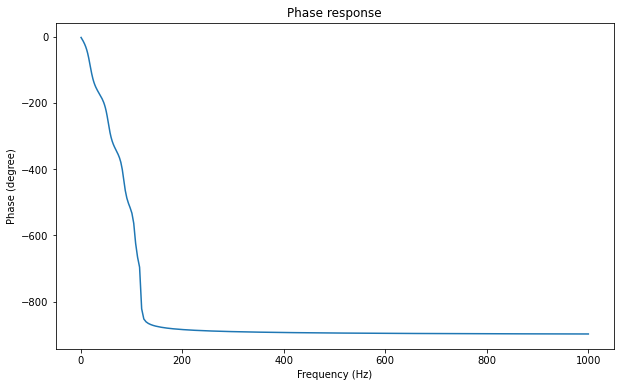

In [13]:
#input parameters

# N : order of the filter
N = 10

# rp : Maximum ripple in passband in Db
rp = 5

# Wc : Critical Frequency of the low - pass filter
Wc = 120

# types : type of the filter used (low pass filter)
types = 'low'

# fs : sampling frequency of the signal
fs = 1000

#b,a are the numerator and denominators of the filter
b, a = signal.cheby1(N, rp, Wc,types, analog=True)
# Compute frequency response of the filter
# using signal.freqz function
wz, hz = signal.freqs(b, a)

# Calculate Magnitude from hz in dB
Mag = 20*np.log10(abs(hz))

# Calculate phase angle in degree from hz
Phase = np.unwrap(np.arctan2(np.imag(hz), np.real(hz)))*(180/np.pi)

# Calculate frequency in Hz from wz
Freq = wz*fs/(2*np.pi)

# Plot Magnitude response
plt.figure(figsize=(10, 6))
plt.semilogx(wz, Mag)
plt.title('Chebyshev Type I frequency response (rp=5)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(Wc, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp
plt.show()

# Plot Phase response
plt.figure(figsize=(10, 6))
plt.plot(wz, Phase)
plt.title('Phase response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degree)')
plt.show()

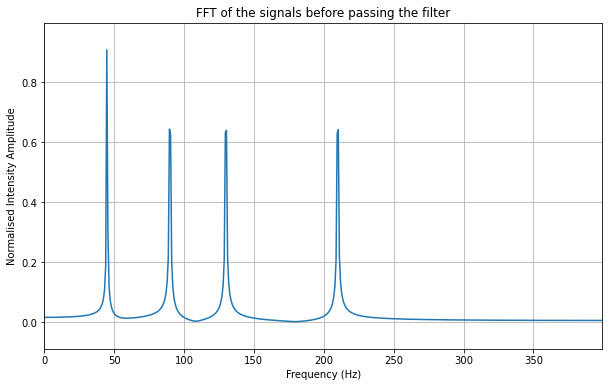

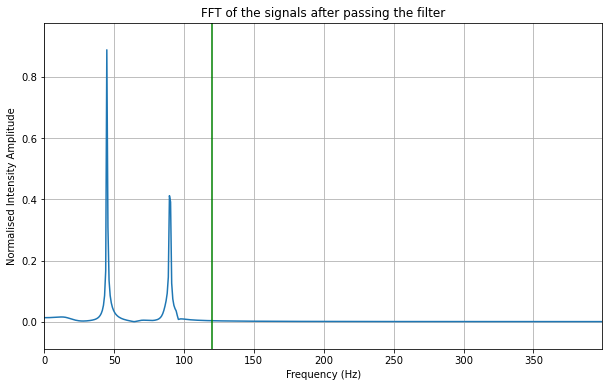

In [14]:
# after the frequency - gain response we will test our filter against an input signal

# no of sample points
n = 1000

# sample spacing
T = 1.0 / 800.0
t = np.linspace(0.0, n*T, n, endpoint=False)

#input signal consisting of 75 Hz, 90 Hz, 130 Hz, 210 Hz
y = np.sin(2*np.pi*45*t) + np.sin(2*np.pi*90*t) + np.sin(2*np.pi*130*t) + np.sin(2*np.pi*210*t)

# applying fft to the input signal and plotting
yf = fft(y)
xf = fftfreq(n, T)[:n//2]
plt.figure(figsize=(10, 6))
plt.plot(xf, 2.0/n * np.abs(yf[0:n//2]))
plt.title('FFT of the signals before passing the filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalised Intensity Amplitude' )
plt.margins(0, 0.1)
plt.grid()
plt.show()

# passing the signal through the filter and obtaining sos output
sos = signal.cheby1(N, rp, Wc, 'low', fs=1000, output='sos')
filtered = signal.sosfilt(sos, y)

# applying fft to the filtered signal and plotting
yf = fft(filtered)
xf = fftfreq(n, T)[:n//2]
plt.figure(figsize=(10, 6))
plt.plot(xf, 2.0/n * np.abs(yf[0:n//2]))
plt.title('FFT of the signals after passing the filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalised Intensity Amplitude' )
plt.axvline(120, color='green')
plt.margins(0, 0.1)
plt.grid()
plt.show()

## Conculsions

We succesfully implemented the chybyshev filters and used it to create a low pass filter. We also tested it against our input sample it was working correctly.
